<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Bengal/trinamoolBengal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 452 (delta 12), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (452/452), 21.38 MiB | 35.66 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [3]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"trinamool bengal"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('trinamool_bengal.csv',index = False)

2020-11-21 20:01:36
1330239963737231366
False
@manickamtagore Congress Calling Trinamool Congress Is B Team Of BJP And Even Left Which Was Your Alliance Partner Now In Bengal

Just See The Date Sir

BJP Didn't Not Get Deposits In 2011🤣🤣

But Ur Leaders Called B Team Of BJP https://t.co/Xz2TkY9aAo
KumarReddy272
India
Twitter for Android
1
21
133
0
<--------------------------------------------------->
1
2020-11-21 19:03:30
1330225341340798983
True
On Saturday BJP’s State President Dilip Ghosh in a Press Conference said not only central leaders &amp; new leaders sent by BJP in Bengal are outsider but also Trinamool has had many outsiders ,he named Ex-MP K.D. Singh &amp; Ahamed Hassan(Imran).I have sent a PRESS Release to the Media- https://t.co/bNkv0cCmcr
AhamedHassanMP
Kolkata, India
Twitter for iPhone
53
770
138
12
<--------------------------------------------------->
2
2020-11-21 18:24:42
1330215578234216449
False
At least five Trinamool Congress MPs in West Bengal including Saugata Ro

In [4]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       133 non-null    datetime64[ns]
 1   Tweet_id   133 non-null    int64         
 2   Verified   133 non-null    bool          
 3   Tweet      133 non-null    object        
 4   User       133 non-null    object        
 5   Location   133 non-null    object        
 6   Source     133 non-null    object        
 7   Likes      133 non-null    int64         
 8   Followers  133 non-null    int64         
 9   Following  133 non-null    int64         
 10  Retweets   133 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 10.6+ KB


In [6]:
df.shape

(133, 11)

In [8]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [9]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [11]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [12]:
df['Source'].value_counts()

Twitter Web App                   56
Twitter for Android               47
TweetDeck                          8
Twitter for iPhone                 5
Hootsuite Inc.                     3
Twitter Media Studio - LiveCut     2
Twitter Media Studio               2
WordPress.com                      2
NDTVfeed                           2
IFTTT                              2
Rajneeti News                      1
ClarionIndia                       1
Republicworld                      1
Blog2Social APP                    1
Name: Source, dtype: int64

In [13]:
df['Location'].nunique()

50

In [14]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

133

In [15]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


131

In [16]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [19]:
df['Tweet'].duplicated().sum()

0

In [21]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(131, 11)

In [22]:
df['Tweet'].duplicated().sum()

0

In [23]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [24]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [25]:
df.shape

(131, 12)

In [26]:
df['Processed_Tweet']

0      @manickamtagore Congress Calling Trinamool Con...
1      On Saturday BJP’s State President Dilip Ghosh ...
2      At least five Trinamool Congress MPs in West B...
3      The TMC and the BJP are the culprits for the d...
4      Janata Janardan is everything in a democracy. ...
                             ...                        
126    Responding to it, Mallick, president of the No...
127    #Secular India*#Brand West Bengal*\nSince 2008...
128    TRINAMOOL MLA Niamat Sheikh DON"T Require PK i...
129    New Video Will Owaisi’s AIMIM Be An X Factor I...
130    West Bengal BJP chief Ghosh’s allegations get ...
Name: Processed_Tweet, Length: 131, dtype: object

In [27]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      @manickamtagore Congress Calling Trinamool Con...
1      On Saturday BJP’s State President Dilip Ghosh ...
2      At least five Trinamool Congress MPs in West B...
3      The TMC and the BJP are the culprits for the d...
4      Janata Janardan is everything in a democracy. ...
                             ...                        
126    Responding to it, Mallick, president of the No...
127    #Secular India*#Brand West Bengal*\nSince 2008...
128    TRINAMOOL MLA Niamat Sheikh DON"T Require PK i...
129    New Video Will Owaisi’s AIMIM Be An X Factor I...
130    West Bengal BJP chief Ghosh’s allegations get ...
Name: Processed_Tweet, Length: 131, dtype: object

In [28]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0        Congress Calling Trinamool Congress Is B Tea...
1      On Saturday BJP’s State President Dilip Ghosh ...
2      At least five Trinamool Congress MPs in West B...
3      The TMC and the BJP are the culprits for the d...
4      Janata Janardan is everything in a democracy. ...
                             ...                        
126    Responding to it, Mallick, president of the No...
127    #Secular India*#Brand West Bengal*\nSince 2008...
128    TRINAMOOL MLA Niamat Sheikh DON"T Require PK i...
129    New Video Will Owaisi’s AIMIM Be An X Factor I...
130    West Bengal BJP chief Ghosh’s allegations get ...
Name: Processed_Tweet, Length: 131, dtype: object

In [29]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0        Congress Calling Trinamool Congress Is B Tea...
1      On Saturday BJP’s State President Dilip Ghosh ...
2      At least five Trinamool Congress MPs in West B...
3      The TMC and the BJP are the culprits for the d...
4      Janata Janardan is everything in a democracy. ...
                             ...                        
126    Responding to it, Mallick, president of the No...
127    #Secular India*#Brand West Bengal*\nSince 2008...
128    TRINAMOOL MLA Niamat Sheikh DON"T Require PK i...
129    New Video Will Owaisi’s AIMIM Be An X Factor I...
130    West Bengal BJP chief Ghosh’s allegations get ...
Name: Processed_Tweet, Length: 131, dtype: object

In [30]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0        Congress Calling Trinamool Congress Is B Tea...
1      On Saturday BJP’s State President Dilip Ghosh ...
2      At least five Trinamool Congress MPs in West B...
3      The TMC and the BJP are the culprits for the d...
4      Janata Janardan is everything in a democracy. ...
                             ...                        
126    Responding to it, Mallick, president of the No...
127    Secular India*Brand West Bengal*\nSince 2008,d...
128    TRINAMOOL MLA Niamat Sheikh DON"T Require PK i...
129    New Video Will Owaisi’s AIMIM Be An X Factor I...
130    West Bengal BJP chief Ghosh’s allegations get ...
Name: Processed_Tweet, Length: 131, dtype: object

In [31]:
!pip install tweet-preprocessor

In [33]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      Congress Calling Trinamool Congress Is B Team ...
1      On Saturday BJPs State President Dilip Ghosh i...
2      At least five Trinamool Congress MPs in West B...
3      The TMC and the BJP are the culprits for the d...
4      Janata Janardan is everything in a democracy. ...
                             ...                        
126    Responding to it, Mallick, president of the No...
127    Secular India*Brand West Bengal*Since ,due to ...
128    TRINAMOOL MLA Niamat Sheikh DON"T Require PK i...
129    New Video Will Owaisis AIMIM Be An XFactor In ...
130    West Bengal BJP chief Ghoshs allegations get s...
Name: Processed_Tweet, Length: 131, dtype: object

In [34]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      Congress Calling Trinamool Congress Is B Team ...
1      On Saturday BJPs State President Dilip Ghosh i...
2      At least five Trinamool Congress MPs in West B...
3      The TMC and the BJP are the culprits for the d...
4      Janata Janardan is everything in a democracy  ...
                             ...                        
126    Responding to it  Mallick  president of the No...
127    Secular India Brand West Bengal Since  due to ...
128    TRINAMOOL MLA Niamat Sheikh DON T Require PK i...
129    New Video Will Owaisis AIMIM Be An XFactor In ...
130    West Bengal BJP chief Ghoshs allegations get s...
Name: Processed_Tweet, Length: 131, dtype: object

In [35]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      congress calling trinamool congress is b team ...
1      on saturday bjps state president dilip ghosh i...
2      at least five trinamool congress mps in west b...
3      the tmc and the bjp are the culprits for the d...
4      janata janardan is everything in a democracy  ...
                             ...                        
126    responding to it  mallick  president of the no...
127    secular india brand west bengal since  due to ...
128    trinamool mla niamat sheikh don t require pk i...
129    new video will owaisis aimim be an xfactor in ...
130    west bengal bjp chief ghoshs allegations get s...
Name: Processed_Tweet, Length: 131, dtype: object

In [36]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'similar in west bengal before the most of the right voted for trinamool or congress to throw out left from the government '

In [39]:
df['User'].value_counts()

Satyanewshi        6
ndtv               5
derekobrienmp      3
DailyO_            3
TheQuint           3
                  ..
srinu11224         1
simple_lifeme      1
abhijitdas20ad     1
TheDailyPioneer    1
aprichitrahul      1
Name: User, Length: 102, dtype: int64

In [41]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


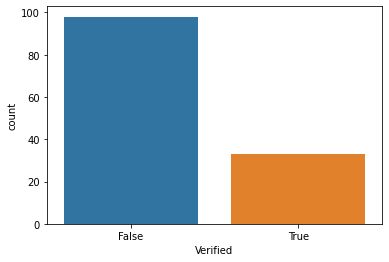

In [42]:
bar = sns.countplot(df['Verified'])

In [43]:
df['Verified'].value_counts()

False    98
True     33
Name: Verified, dtype: int64

In [44]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

ndtv               5
DailyO_            3
derekobrienmp      3
TheQuint           3
ndtvvideos         2
CNNnews18          2
Outlookindia       2
ndtvfeed           2
IndiaToday         2
republic           1
EconomicTimes      1
THKolkata          1
TheDailyPioneer    1
AhamedHassanMP     1
AmanKayamHai_ET    1
IndianExpress      1
ShoaibDaniyal      1
BJP4Bengal         1
Name: User, dtype: int64

In [45]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({16: 5, 17: 7, 18: 41, 19: 34, 20: 24, 21: 20})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

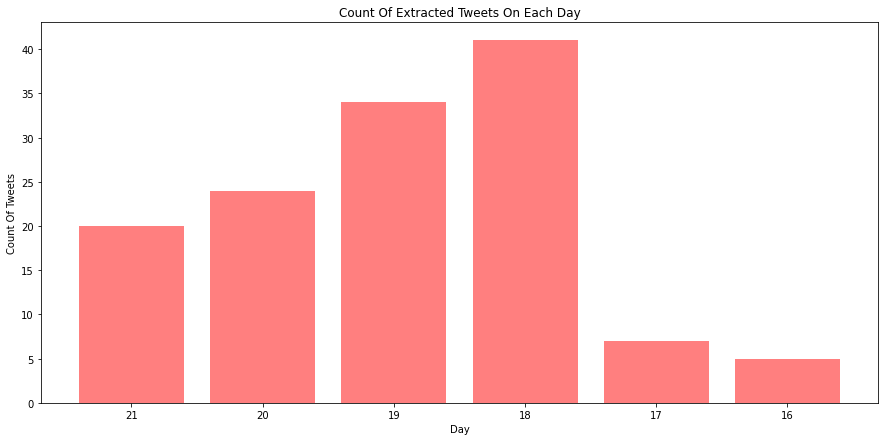

In [46]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [47]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 2,
         1: 1,
         2: 2,
         3: 8,
         4: 6,
         5: 4,
         6: 8,
         7: 4,
         8: 9,
         9: 7,
         10: 6,
         11: 7,
         12: 7,
         13: 8,
         14: 6,
         15: 12,
         16: 7,
         17: 2,
         18: 17,
         19: 3,
         20: 3,
         21: 1,
         23: 1})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

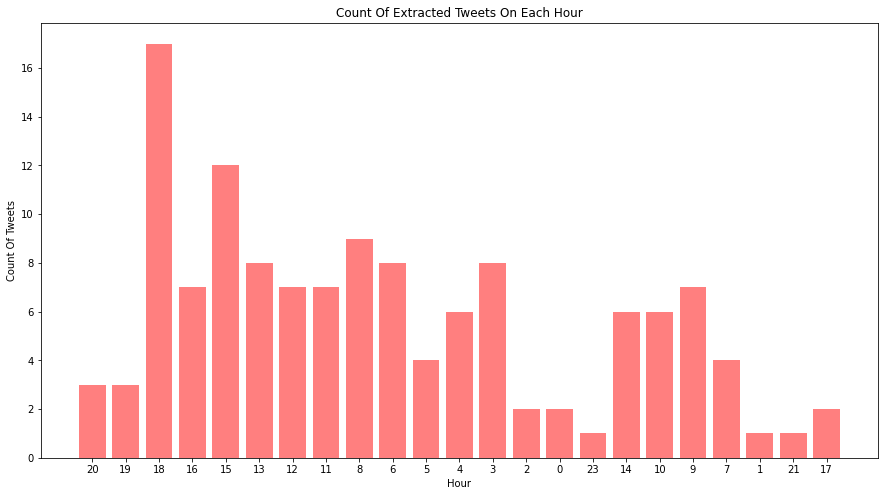

In [48]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [49]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['be', 'down', 'after', 'during', 'he', 'o', 'no', "haven't", 'up', "mustn't", 'nor', 'it', 'yourselves', 'himself', 'same', 'out', 'herself', 'of', 'more', 'above', "couldn't", 'd', 'most', 'mustn', 'she', "shan't", 'both', 'we', 'his', 'our', 'than', 'between', 'but', 'them', 'with', 'was', 'should', 'needn', 'my', 'against', "you'll", "needn't", 'few', 'about', 'so', 'if', 'through', 's', 'yourself', 'your', 'very', 'now', 'haven', 'such', 'yours', 'have', 'when', 'they', 'were', 'itself', 'this', 'll', 'myself', 'what', 'to', 'do', 'once', "didn't", 'that', 'ours', "you're", "won't", 'him', 'too', 'or', 'the', 'am', 'you', 'being', 'shan', "you'd", 'where', 'wouldn', 'again', 'did', 'mightn', 'into', 'does', 'ourselves', 'its', 'will', 'until', 'own', "you've", "aren't", 'off', 'can', 'at', 'some', 'didn', 'won', 're', 'i', "that'll", 'a', 'an', 't', 'in', 'because', "hadn't", 'hers', "doesn't", "weren't", "shouldn't", "she's", 'is', "isn't", 'all', "wouldn't", 'not', 'any', 'ain',

In [52]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      congress calling trinamool congress b team bjp...
1      saturday bjps state president dilip ghosh pres...
2      least five trinamool congress mps west bengal ...
3      tmc bjp culprits dirty politics west bengal mo...
4      janata janardan everything democracy mamta did...
                             ...                        
126    responding mallick president north parganas di...
127    secular india brand west bengal since due terr...
128    trinamool mla niamat sheikh require pk murshid...
129    new video owaisis aimim xfactor bengal trinamo...
130    west bengal bjp chief ghoshs allegations get s...
Name: Processed_Tweet, Length: 131, dtype: object

In [53]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [congress, calling, trinamool, congress, b, te...
1      [saturday, bjps, state, president, dilip, ghos...
2      [least, five, trinamool, congress, mps, west, ...
3      [tmc, bjp, culprits, dirty, politics, west, be...
4      [janata, janardan, everything, democracy, mamt...
                             ...                        
126    [responding, mallick, president, north, pargan...
127    [secular, india, brand, west, bengal, since, d...
128    [trinamool, mla, niamat, sheikh, require, pk, ...
129    [new, video, owaisis, aimim, xfactor, bengal, ...
130    [west, bengal, bjp, chief, ghoshs, allegations...
Name: Processed_Tweet, Length: 131, dtype: object

In [54]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [congress, call, trinamool, congress, b, team,...
1      [saturday, bjp, state, presid, dilip, ghosh, p...
2      [least, five, trinamool, congress, mp, west, b...
3      [tmc, bjp, culprit, dirti, polit, west, bengal...
4      [janata, janardan, everyth, democraci, mamta, ...
                             ...                        
126    [respond, mallick, presid, north, pargana, dis...
127    [secular, india, brand, west, bengal, sinc, du...
128    [trinamool, mla, niamat, sheikh, requir, pk, m...
129    [new, video, owaisi, aimim, xfactor, bengal, t...
130    [west, bengal, bjp, chief, ghosh, alleg, get, ...
Name: Processed_Tweet, Length: 131, dtype: object

In [55]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 20:01:36,1330239963737231366,False,@manickamtagore Congress Calling Trinamool Con...,KumarReddy272,India,Twitter for Android,1,21,133,0,"[congress, call, trinamool, congress, team, bj..."
1,2020-11-21 19:03:30,1330225341340798983,True,On Saturday BJP’s State President Dilip Ghosh ...,AhamedHassanMP,"Kolkata, India",Twitter for iPhone,53,770,138,12,"[saturday, bjp, state, presid, dilip, ghosh, p..."
2,2020-11-21 18:24:42,1330215578234216449,False,At least five Trinamool Congress MPs in West B...,DeshGujarat,"Gujarat, India",TweetDeck,50,437695,191,6,"[least, five, trinamool, congress, west, benga..."
3,2020-11-21 18:08:53,1330211595717373952,False,The TMC and the BJP are the culprits for the d...,DrDIPANKARROY3,,Twitter for Android,0,19,178,0,"[tmc, bjp, culprit, dirti, polit, west, bengal..."
4,2020-11-21 16:05:51,1330180633054867459,False,Janata Janardan is everything in a democracy. ...,aprichitrahul,Bundelkhand Uttar Pradesh,Twitter for Android,3,3364,3016,0,"[janata, janardan, everyth, democraci, mamta, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
126,2020-11-16 20:00:01,1328427624142491650,True,"Responding to it, Mallick, president of the No...",EconomicTimes,,TweetDeck,10,3770339,43,1,"[respond, mallick, presid, north, pargana, dis..."
127,2020-11-16 18:59:38,1328412427243851776,False,#Secular India*#Brand West Bengal*\nSince 2008...,SUNDARmyth,KOLKATA,Twitter Web App,16,12775,1597,4,"[secular, india, brand, west, bengal, sinc, du..."
128,2020-11-16 12:39:26,1328316748450263040,False,"TRINAMOOL MLA Niamat Sheikh DON""T Require PK i...",Satyanewshi,"Hobart , 🇦🇺",Twitter Web App,48,14204,260,12,"[trinamool, mla, niamat, sheikh, requir, mursh..."
129,2020-11-16 07:56:47,1328245615927513088,False,New Video Will Owaisi’s AIMIM Be An X Factor I...,secularmiyabha3,,Twitter for Android,13,1178,10,1,"[new, video, owaisi, aimim, xfactor, bengal, t..."


In [56]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

2391

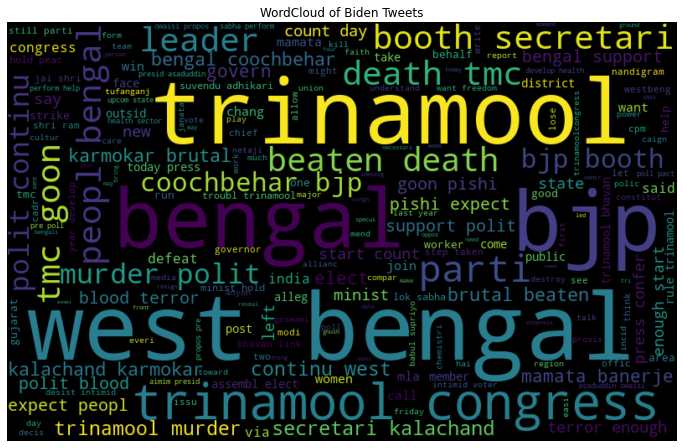

In [57]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Biden Tweets")
plt.show()

In [58]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

131

In [59]:
len(text)

2391

In [60]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 37
Negative Tweets: 27
Neutral Tweets 67


In [61]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [63]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.085,0.915,0.000,-0.3400
3,0.129,0.760,0.110,-0.1280
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
126,0.000,0.787,0.213,0.5859
127,0.105,0.895,0.000,-0.5267
128,0.000,1.000,0.000,0.0000
129,0.000,1.000,0.000,0.0000


In [64]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,1.000,0.00,0.000,Neutral
1,0.000,1.000,0.00,0.000,Neutral
2,0.085,0.915,0.00,-0.340,Negative
3,0.129,0.760,0.11,-0.128,Negative
4,0.000,1.000,0.00,0.000,Neutral


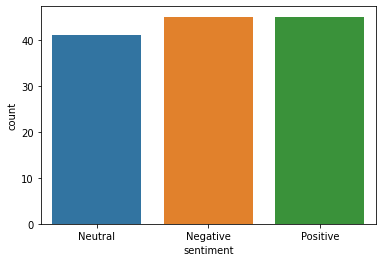

In [65]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [67]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Bengal/trinamool_bengal.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

221

In [68]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [70]:
word_emotion=dict()
for i in range(0,221):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [71]:
for i in range(0,131):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [72]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

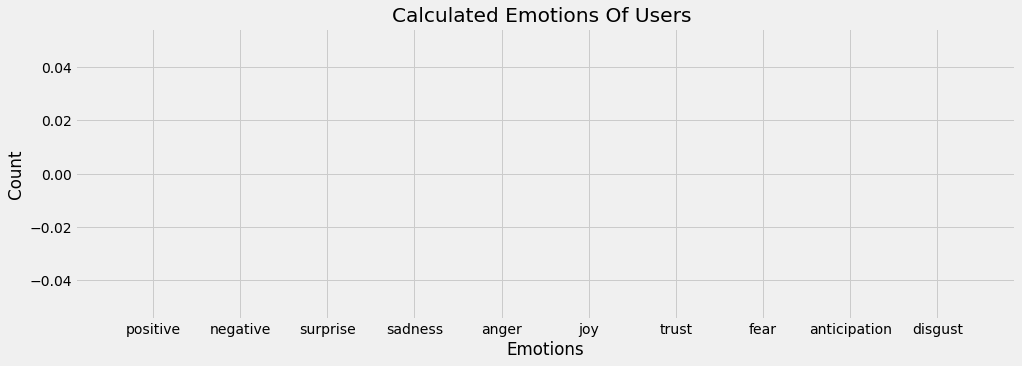

In [73]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [79]:
df.Location  = df.Location.fillna('USA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [80]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                                  38
India                             20
Kolkata, India                     6
Hobart , 🇦🇺                        6
New Delhi, India                   4
West Bengal, India                 4
KOLKATA                            3
New Delhi, Delhi                   3
Kolkata, West Bengal               2
Serampore, Hooghly                 2
Jharkhand   INDIA                  2
London                             2
Kolkata                            2
Bharat                             1
Kolkata                            1
 Kolkata                           1
Siliguri, India                    1
Uttar Pradesh, India               1
Tripura, India                     1
Purulion, JNU 'ite nw B,lorean     1
Bhopal (India)                     1
NEW DELHI                          1
Kolkata, West Bengal, India        1
Delhi                              1
Asansol, India                     1
खड़गपुर रेलवे स्टेशन क्षेत्र,      1
Raiganj (U/D), Kolkata             1
T

In [81]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 20:01:36,1330239963737231366,False,@manickamtagore Congress Calling Trinamool Con...,KumarReddy272,India,Twitter for Android,1,21,133,0,"[congress, call, trinamool, congress, team, bj...",India,Neutral,21
1,2020-11-21 19:03:30,1330225341340798983,True,On Saturday BJP’s State President Dilip Ghosh ...,AhamedHassanMP,"Kolkata, India",Twitter for iPhone,53,770,138,12,"[saturday, bjp, state, presid, dilip, ghosh, p...",Kolkata,Neutral,21
2,2020-11-21 18:24:42,1330215578234216449,False,At least five Trinamool Congress MPs in West B...,DeshGujarat,"Gujarat, India",TweetDeck,50,437695,191,6,"[least, five, trinamool, congress, west, benga...",Gujarat,Negative,21
3,2020-11-21 18:08:53,1330211595717373952,False,The TMC and the BJP are the culprits for the d...,DrDIPANKARROY3,,Twitter for Android,0,19,178,0,"[tmc, bjp, culprit, dirti, polit, west, bengal...",,Negative,21
4,2020-11-21 16:05:51,1330180633054867459,False,Janata Janardan is everything in a democracy. ...,aprichitrahul,Bundelkhand Uttar Pradesh,Twitter for Android,3,3364,3016,0,"[janata, janardan, everyth, democraci, mamta, ...",Bundelkhand Uttar Pradesh,Neutral,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2020-11-16 20:00:01,1328427624142491650,True,"Responding to it, Mallick, president of the No...",EconomicTimes,,TweetDeck,10,3770339,43,1,"[respond, mallick, presid, north, pargana, dis...",,Positive,16
127,2020-11-16 18:59:38,1328412427243851776,False,#Secular India*#Brand West Bengal*\nSince 2008...,SUNDARmyth,KOLKATA,Twitter Web App,16,12775,1597,4,"[secular, india, brand, west, bengal, sinc, du...",KOLKATA,Negative,16
128,2020-11-16 12:39:26,1328316748450263040,False,"TRINAMOOL MLA Niamat Sheikh DON""T Require PK i...",Satyanewshi,"Hobart , 🇦🇺",Twitter Web App,48,14204,260,12,"[trinamool, mla, niamat, sheikh, requir, mursh...",Hobart,Neutral,16
129,2020-11-16 07:56:47,1328245615927513088,False,New Video Will Owaisi’s AIMIM Be An X Factor I...,secularmiyabha3,,Twitter for Android,13,1178,10,1,"[new, video, owaisi, aimim, xfactor, bengal, t...",,Neutral,16


In [82]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [83]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 20:01:36,1330239963737231366,False,@manickamtagore Congress Calling Trinamool Con...,KumarReddy272,India,Twitter for Android,1,21,133,0,"[congress, call, trinamool, congress, team, bj...",India,Neutral,21
1,2020-11-21 19:03:30,1330225341340798983,True,On Saturday BJP’s State President Dilip Ghosh ...,AhamedHassanMP,"Kolkata, India",Twitter for iPhone,53,770,138,12,"[saturday, bjp, state, presid, dilip, ghosh, p...",Kolkata,Neutral,21
2,2020-11-21 18:24:42,1330215578234216449,False,At least five Trinamool Congress MPs in West B...,DeshGujarat,"Gujarat, India",TweetDeck,50,437695,191,6,"[least, five, trinamool, congress, west, benga...",Gujarat,Negative,21
3,2020-11-21 18:08:53,1330211595717373952,False,The TMC and the BJP are the culprits for the d...,DrDIPANKARROY3,,Twitter for Android,0,19,178,0,"[tmc, bjp, culprit, dirti, polit, west, bengal...",,Negative,21
4,2020-11-21 16:05:51,1330180633054867459,False,Janata Janardan is everything in a democracy. ...,aprichitrahul,Bundelkhand Uttar Pradesh,Twitter for Android,3,3364,3016,0,"[janata, janardan, everyth, democraci, mamta, ...",Bundelkhand Uttar Pradesh,Neutral,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


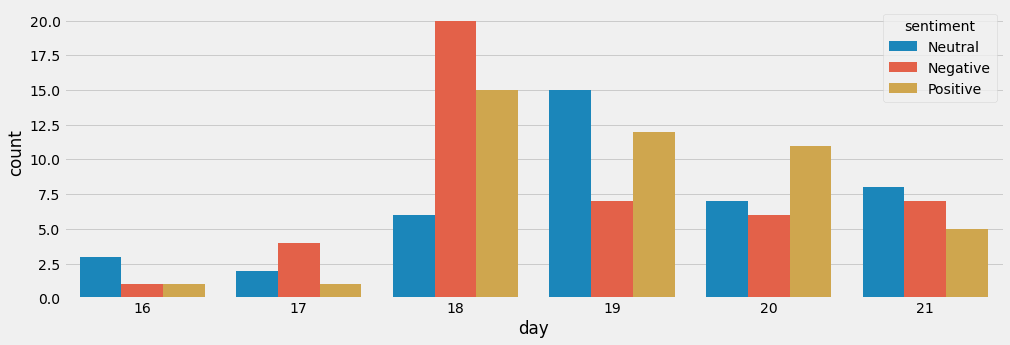

In [84]:
sns.countplot(df['day'],hue = df['sentiment'])

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [86]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 20:01:36,1330239963737231366,False,@manickamtagore Congress Calling Trinamool Con...,KumarReddy272,India,Twitter for Android,1,21,133,0,"[congress, call, trinamool, congress, team, bj...",India,Neutral,21,1
1,2020-11-21 19:03:30,1330225341340798983,True,On Saturday BJP’s State President Dilip Ghosh ...,AhamedHassanMP,"Kolkata, India",Twitter for iPhone,53,770,138,12,"[saturday, bjp, state, presid, dilip, ghosh, p...",Kolkata,Neutral,21,1
2,2020-11-21 18:24:42,1330215578234216449,False,At least five Trinamool Congress MPs in West B...,DeshGujarat,"Gujarat, India",TweetDeck,50,437695,191,6,"[least, five, trinamool, congress, west, benga...",Gujarat,Negative,21,0
3,2020-11-21 18:08:53,1330211595717373952,False,The TMC and the BJP are the culprits for the d...,DrDIPANKARROY3,,Twitter for Android,0,19,178,0,"[tmc, bjp, culprit, dirti, polit, west, bengal...",,Negative,21,0
4,2020-11-21 16:05:51,1330180633054867459,False,Janata Janardan is everything in a democracy. ...,aprichitrahul,Bundelkhand Uttar Pradesh,Twitter for Android,3,3364,3016,0,"[janata, janardan, everyth, democraci, mamta, ...",Bundelkhand Uttar Pradesh,Neutral,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2020-11-16 20:00:01,1328427624142491650,True,"Responding to it, Mallick, president of the No...",EconomicTimes,,TweetDeck,10,3770339,43,1,"[respond, mallick, presid, north, pargana, dis...",,Positive,16,2
127,2020-11-16 18:59:38,1328412427243851776,False,#Secular India*#Brand West Bengal*\nSince 2008...,SUNDARmyth,KOLKATA,Twitter Web App,16,12775,1597,4,"[secular, india, brand, west, bengal, sinc, du...",KOLKATA,Negative,16,0
128,2020-11-16 12:39:26,1328316748450263040,False,"TRINAMOOL MLA Niamat Sheikh DON""T Require PK i...",Satyanewshi,"Hobart , 🇦🇺",Twitter Web App,48,14204,260,12,"[trinamool, mla, niamat, sheikh, requir, mursh...",Hobart,Neutral,16,1
129,2020-11-16 07:56:47,1328245615927513088,False,New Video Will Owaisi’s AIMIM Be An X Factor I...,secularmiyabha3,,Twitter for Android,13,1178,10,1,"[new, video, owaisi, aimim, xfactor, bengal, t...",,Neutral,16,1


In [87]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [89]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [90]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [91]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.5
Precision Score:  0.5
Recall Score:  0.5
F1 Score:  0.5


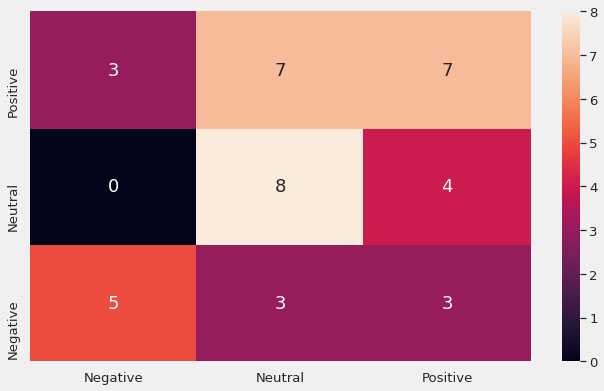

In [92]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [93]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [96]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [97]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5822222222222222
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [98]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.45
Precision Score:  0.45
Recall Score:  0.45
F1 Score:  0.45


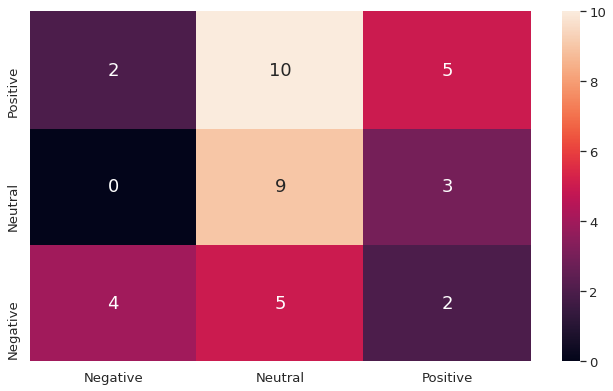

In [99]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [100]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [101]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.475
Precision Score:  0.475
Recall Score:  0.475
F1 Score:  0.47500000000000003


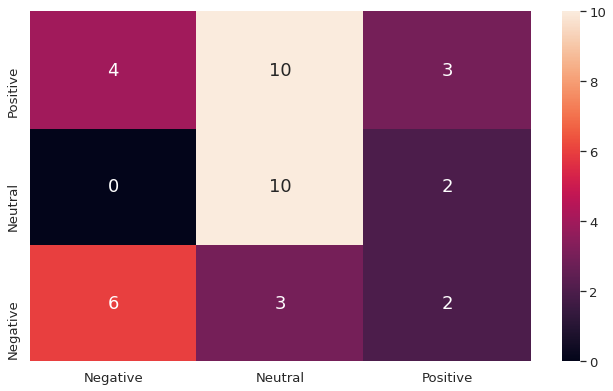

In [102]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [103]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [104]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, max_depth=5, criterion=gini, score=0.632, total=   0.7s
[CV] n_estimators=500, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=500, max_depth=5, criterion=gini, score=0.444, total=   0.7s
[CV] n_estimators=500, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=500, max_depth=5, criterion=gini, score=0.500, total=   0.7s
[CV] n_estimators=500, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=500, max_depth=5, criterion=gini, score=0.556, total=   0.7s
[CV] n_estimators=500, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=500, max_depth=5, criterion=gini, score=0.667, total=   0.7s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.579, total=   1.9s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.500, total=   1.8s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.2s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.500, total=   1.9s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.0s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.611, total=   1.8s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.9s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.611, total=   1.8s
[CV] n_estimators=1300, max_depth=11, criterion=gini .................
[CV]  n_estimators=1300, max_depth=11, criterion=gini, score=0.684, total=   1.8s
[CV] n_estimators=1300, max_depth=11, criterion=gini .................
[CV]  n_estimators=1300, max_depth=11, criterion=gini, score=0.500, total=   1.8s
[CV] n_estimators=1300, max_depth=11, criterion=gini .................
[CV]  n_estimators=1300, max_depth=11, criterion=gini, score=0.611, total=   1.8s
[CV] n_estimators=1300, max_depth=11, criterion=gini .................
[CV]  n_estimators=1300, max_depth=11, criterion=gini, score=0.500, total=   1.9s
[CV] n_estimators=1300, max_depth=11, criterion=gini .................
[CV]  n_estimators=1300, max_depth=11, criterion=gini, score=0.722, total=   1.8s
[CV] n_estimators=800, max_depth=17, criterion=gini ..................
[CV]  n_estimators=800, max_depth=17, criterion=gini, score=0.684, total=   1.1s
[C

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


0.6035087719298246
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [105]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5
Precision Score:  0.5
Recall Score:  0.5
F1 Score:  0.5


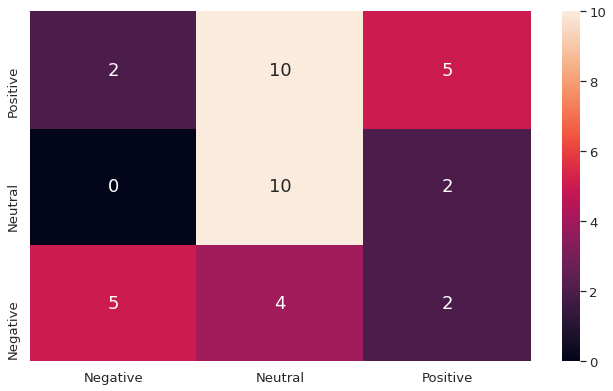

In [106]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [107]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.575
Precision Score:  0.575
Recall Score:  0.575
F1 Score:  0.575


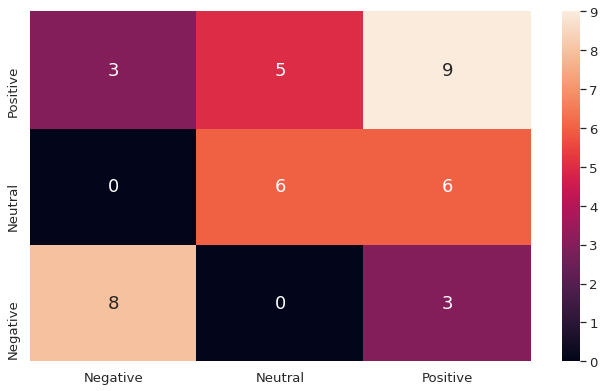

In [108]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [109]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [110]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.5355555555555556
{'alpha': 2, 'class_prior': None, 'fit_prior': True}


In [111]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.575
Precision Score:  0.575
Recall Score:  0.575
F1 Score:  0.575


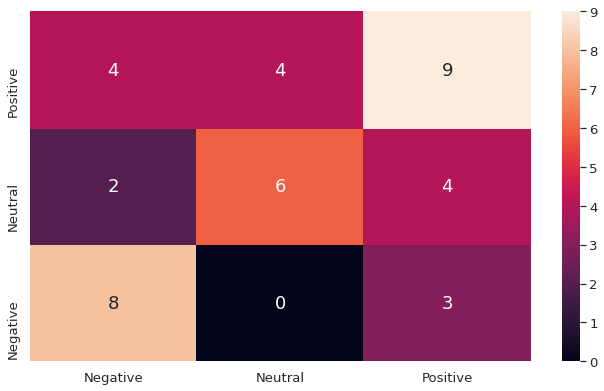

In [112]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

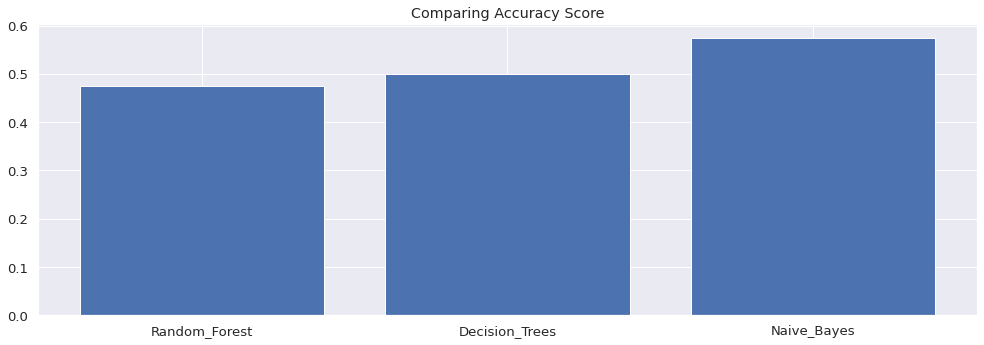

In [113]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

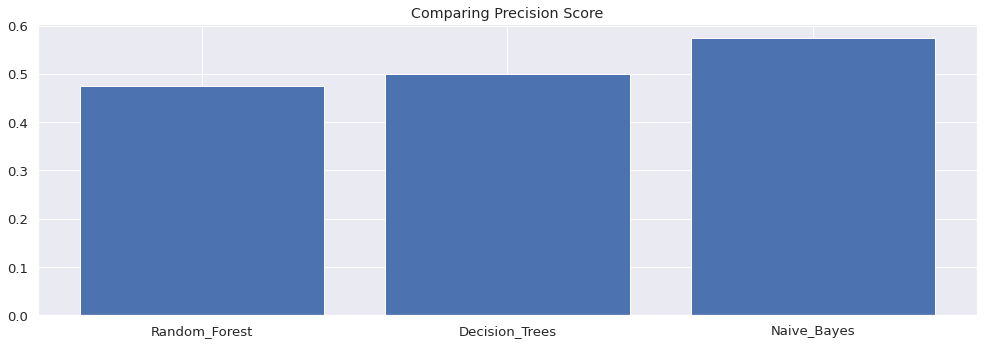

In [114]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

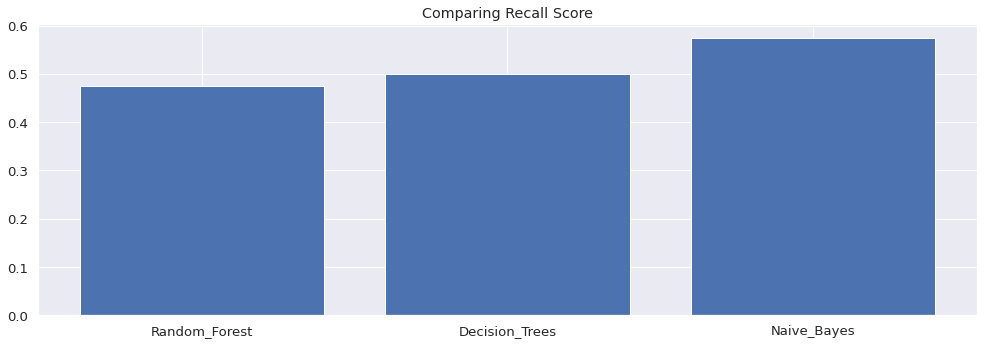

In [115]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

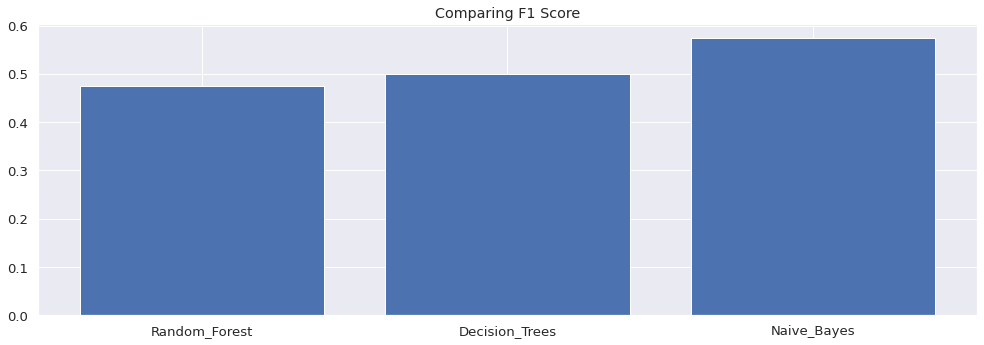

In [116]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()